In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mygrad.components as mc
import mygrad.functional as mf
from mygrad.losses import BinaryCrossEntropy, CategorialCorssEntropy
from mygrad.optimizers import SGD , RMSProp
from mygrad.preprocessors import MinMaxScaler, StandardScaler, IdentityScaler
from mygrad.trainers import BinaryClassificationTrainer, CategoricalClassificationTrainer, ProgressBar, EarlyStopping
from mygrad.dataloaders import NumpyRegressionDataloader, NumpyClassificationDataloader

# Rings 3 Regular

In [2]:
train_df = pd.read_csv("../mio1/classification/rings3-regular-training.csv")
test_df = pd.read_csv("../mio1/classification/rings3-regular-test.csv")

In [3]:
train_df["c"]

0       0
1       0
2       0
3       0
4       0
       ..
1495    2
1496    2
1497    2
1498    2
1499    2
Name: c, Length: 1500, dtype: int64

In [4]:
train_df.head()

,x,y,c
0,-93.563317,-76.345110,0
1,1.060114,-16.727040,0
2,24.396099,40.358822,0
3,-94.595137,-97.889250,0
4,-85.331382,-56.736933,0


Text(0.5, 1.0, 'Wizualizacja zbioru treningowego rings3-regular')

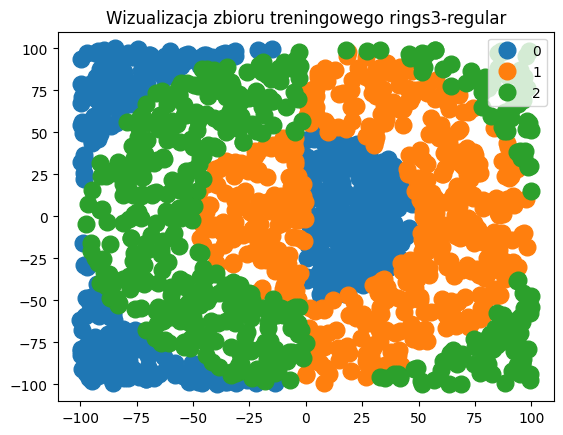

In [5]:
groups = train_df.groupby('c')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

plt.legend(loc="upper right")
plt.title("Wizualizacja zbioru treningowego rings3-regular")

In [6]:
X_train = train_df[["x", "y"]].values
y_train = train_df["c"].values.reshape(-1, 1) * 1

In [7]:
np.unique(y_train)

array([0, 1, 2])

In [8]:
X_train.shape, y_train.shape

((1500, 2), (1500, 1))

In [29]:
input_normalizer = IdentityScaler()

X_train_scaled = input_normalizer.fit_transform(X_train)

In [30]:
X_test = test_df[["x", "y"]].values
X_test_scaled = input_normalizer.transform(X_test)
y_test = test_df["c"].values.reshape(-1, 1) * 1

## Softmax

In [31]:
y_train_onehot = mf.onehot_encode(y_train, 3)
y_test_onehot = mf.onehot_encode(y_test, 3)

In [44]:
model = mc.Sequential(
    mc.Linear(2, 10, init="he"),
    mc.ReLU(),
    mc.Linear(10, 10, init="he"),
    mc.ReLU(),
    mc.Linear(10, 3, init="xavier"),
    mc.Softmax(),
)
optimizer = RMSProp(model.parameters(), learning_rate=0.001)
loss = CategorialCorssEntropy()

train_dataloader = NumpyClassificationDataloader(X_train_scaled, y_train_onehot, batch_size=20, shuffle=True, is_one_hot=True)
validation_dataloader = NumpyClassificationDataloader(X_test_scaled, y_test_onehot, batch_size=100, is_one_hot=True)
trainer = CategoricalClassificationTrainer(model, optimizer, loss, train_dataloader, validation_dataloader, plugins=[
    ProgressBar(),
    EarlyStopping(patience=100, metric="fscore", mode="max")
])
train_outputs = trainer.train(5000)

Training epochs:   0%|          | 0/5000 [00:00<?, ?it/s]

Early stopping at epoch 816


Text(0, 0.5, 'Cross entropy')

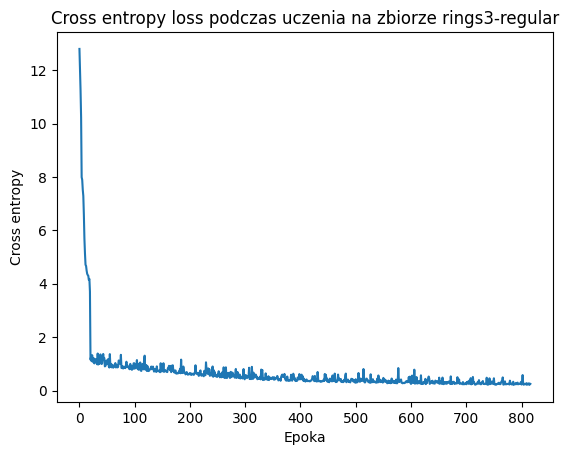

In [45]:
plt.plot(train_outputs["loss"])
plt.title("Cross entropy loss podczas uczenia na zbiorze rings3-regular")
plt.xlabel("Epoka")
plt.ylabel("Cross entropy")

Text(0, 0.5, 'F1 Score')

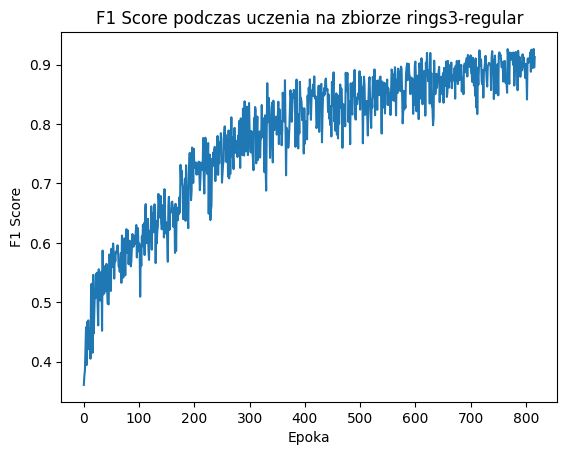

In [46]:
plt.plot(train_outputs["fscore"])
plt.title("F1 Score podczas uczenia na zbiorze rings3-regular")
plt.xlabel("Epoka")
plt.ylabel("F1 Score")

In [47]:
y_pred_scaled = model.forward(X_test_scaled)
y_pred = np.argmax(y_pred_scaled, axis=1)

print(f"F-score: {mf.fscore(y_pred, y_test, 3)}")


F-score: 0.8516226392237858


Text(0.5, 1.0, 'Wizualizacja zbioru testowego rings3-regular')

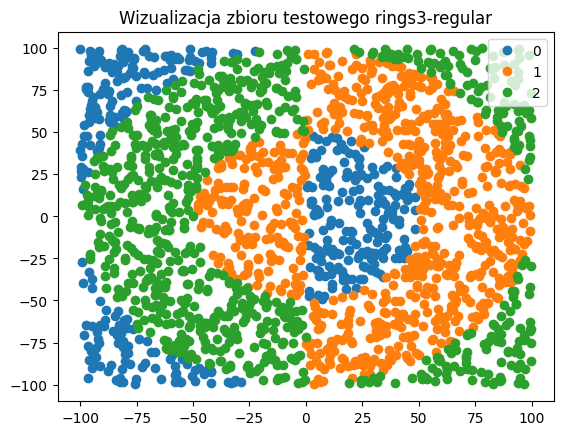

In [43]:
groups = test_df.groupby('c')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=6, label=name)

plt.legend(loc="upper right")
plt.title("Wizualizacja zbioru testowego rings3-regular")

Text(0.5, 1.0, 'Wizualizacja predykcji na zbiorze rings3-regular')

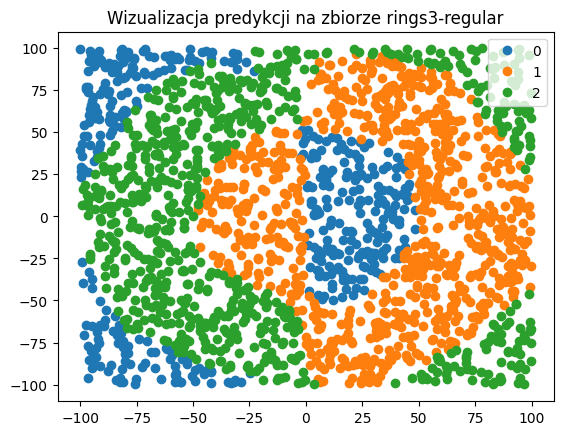

In [44]:
pred_df = pd.DataFrame(X_test, columns=["x", "y"])
pred_df["c"] = y_pred

groups = pred_df.groupby('c')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=6, label=name)

plt.legend(loc="upper right")
plt.title("Wizualizacja predykcji na zbiorze rings3-regular")


Text(0.5, 1.0, 'Wizualizacja poprawności predykcji na zbiorze rings3-regular')

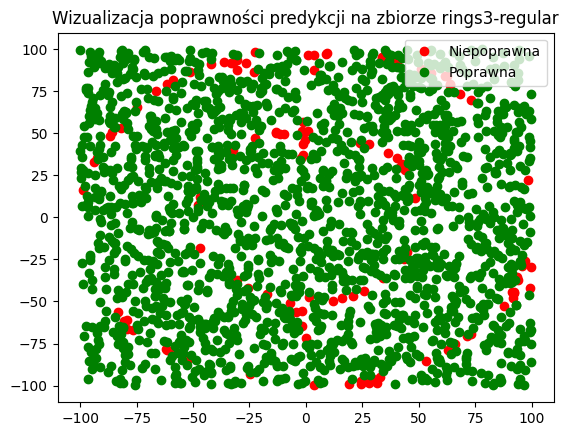

In [42]:
compare_df = pd.DataFrame(X_test, columns=["x", "y"])
compare_df["c"] = y_pred == y_test.flatten()

groups = compare_df.groupby('c')
for name, group in groups:
    if name:
        plt.plot(group.x, group.y, marker='o', linestyle='', markersize=6, color="green", label="Poprawna")
    else:
        plt.plot(group.x, group.y, marker='o', linestyle='', markersize=6, color="red", label="Niepoprawna")


plt.legend(loc="upper right")
plt.title("Wizualizacja poprawności predykcji na zbiorze rings3-regular")